In [8]:
df_model_eval = pd.DataFrame(columns=['Model', 'MSE', 'RMSE', 'MAE', 'R2', 'MAPE'])

In [5]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
 # 读取数据
data = pd.read_csv(r"D:\DL_Homework\Kaggle2_Titanic\统计建模\数据\data-1.csv", encoding='gb18030')
 # 将 'date' 列转换为日期时间格式
data['date'] = pd.to_datetime(data['date'])
 # 添加年、月、日列
data['year'] = data['date'].dt.year
data['month'] = data['date'].dt.month
data['day'] = data['date'].dt.day
 # 输出结果
print(data.head())

        date  AQI指数  PM2.5  PM10    O3   no2  so2   co     T     Po   U  Ff  \
0 2015-05-17     50    105  41.0  36.0  10.0   14  8.0  25.6  603.9  38   5   
1 2015-05-18     35     80  40.0  33.0   9.0   12  8.0  25.9  604.8  40   3   
2 2015-05-19     30     79  41.0  45.0  11.0   10  9.0  23.8  603.9  53   4   
3 2015-05-20     51     86  27.0  26.0  13.0    6  9.0  21.3  605.1  76   2   
4 2015-05-21     62     86  27.0  27.0   9.0    7  8.0  19.1  605.7  91   1   

     VV  RRR  year  month  day  
0  24.0  0.0  2015      5   17  
1  26.0  0.0  2015      5   18  
2  24.0  0.0  2015      5   19  
3  14.0  0.0  2015      5   20  
4  24.0  4.0  2015      5   21  


nn

In [22]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

 # 读取数据集
cols_to_convert = ['AQI指数', 'PM2.5', 'PM10', 'O3', 'no2', 'so2', 'co', 'T', 'Po', 'U', 'Ff', 'VV', 'RRR', 'year', 'month', 'day']
data[cols_to_convert] = data[cols_to_convert].astype(float)

y = data['AQI指数']
y = stats.boxcox(y)[0]  #对数据进行BOX-COX变换
x = data.drop(['AQI指数','date'], axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
import tensorflow as tf
from tensorflow import keras
 # 构建模型
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(x.shape[1],), activation='relu'),
    keras.layers.BatchNormalization(),  # 批量归一化
    keras.layers.Dropout(0.2),  # Dropout正则化
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='linear')  # 最后一层使用线性激活函数
])
 # 编译模型
model.compile(loss='mean_squared_error', optimizer='adam')
 # 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
 # 定义EarlyStopping回调函数，以便在验证损失不再改善时停止训练
early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min')
 # 训练模型
history = model.fit(x_train, y_train, epochs=1000, batch_size=16, validation_split=0.2, callbacks=[early_stop])
 # 评估模型
test_loss = model.evaluate(x_test, y_test)
 # 进行预测
predictions = model.predict(x_test)

MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))
MAPE = mean_absolute_percentage_error(y_test, predictions)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2:", R2)
print("MAPE:", MAPE)



Epoch 1/1000
116/116 [==============================] - 3s 7ms/step - loss: 23.3944 - val_loss: 20.2377
Epoch 2/1000
116/116 [==============================] - 1s 5ms/step - loss: 16.2880 - val_loss: 13.3216
Epoch 3/1000
116/116 [==============================] - 1s 6ms/step - loss: 9.4204 - val_loss: 5.9170
Epoch 4/1000
116/116 [==============================] - 1s 4ms/step - loss: 4.1790 - val_loss: 2.4111
Epoch 5/1000
116/116 [==============================] - 1s 5ms/step - loss: 2.3188 - val_loss: 1.2036
Epoch 6/1000
116/116 [==============================] - 1s 5ms/step - loss: 1.7317 - val_loss: 0.7825
Epoch 7/1000
116/116 [==============================] - 1s 4ms/step - loss: 1.4224 - val_loss: 0.6719
Epoch 8/1000
116/116 [==============================] - 0s 4ms/step - loss: 1.3544 - val_loss: 0.6029
Epoch 9/1000
116/116 [==============================] - 0s 4ms/step - loss: 1.2161 - val_loss: 0.3574
Epoch 10/1000
116/116 [==============================] - 0s 4ms/step - loss: 1

Epoch 1/1000
116/116 [==============================] - 2s 5ms/step - loss: 23.3509 - val_loss: 18.2332
Epoch 2/1000
116/116 [==============================] - 0s 3ms/step - loss: 16.4918 - val_loss: 11.0962
Epoch 3/1000
116/116 [==============================] - 0s 4ms/step - loss: 9.8929 - val_loss: 5.1054
Epoch 4/1000
116/116 [==============================] - 0s 4ms/step - loss: 4.4010 - val_loss: 1.3974
Epoch 5/1000
116/116 [==============================] - 0s 4ms/step - loss: 2.2759 - val_loss: 0.5861
Epoch 6/1000
116/116 [==============================] - 0s 4ms/step - loss: 1.6565 - val_loss: 0.3258
Epoch 7/1000
116/116 [==============================] - 0s 3ms/step - loss: 1.5329 - val_loss: 0.2761
Epoch 8/1000
116/116 [==============================] - 0s 3ms/step - loss: 1.3733 - val_loss: 0.2301
Epoch 9/1000
116/116 [==============================] - 0s 3ms/step - loss: 1.1673 - val_loss: 0.2157
Epoch 10/1000
116/116 [==============================] - 0s 3ms/step - loss: 1

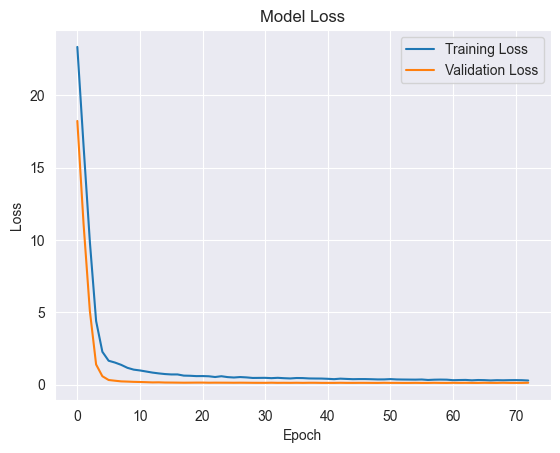

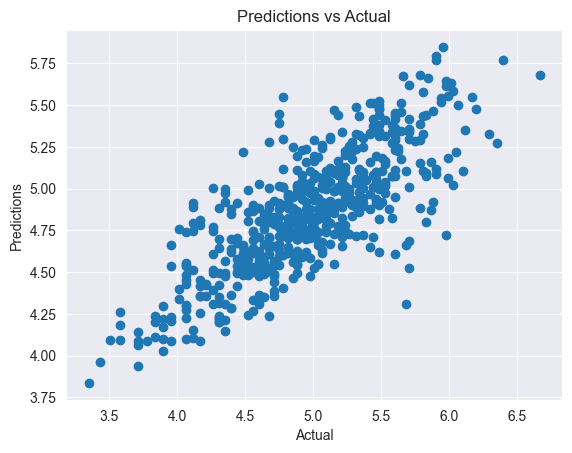

In [6]:
import numpy as np
import pandas as pd
from keras.models import Sequential
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from keras.layers import BatchNormalization
from keras.layers import Dropout
from keras.callbacks import EarlyStopping
from scipy import stats
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

 # 读取数据集
cols_to_convert = ['AQI指数', 'PM2.5', 'PM10', 'O3', 'no2', 'so2', 'co', 'T', 'Po', 'U', 'Ff', 'VV', 'RRR', 'year', 'month', 'day']
data[cols_to_convert] = data[cols_to_convert].astype(float)

y = data['AQI指数']
y = stats.boxcox(y)[0]  #对数据进行BOX-COX变换
x = data.drop(['AQI指数','date'], axis=1)
scaler = StandardScaler()
x = scaler.fit_transform(x)
import tensorflow as tf
from tensorflow import keras
 # 构建模型
model = keras.Sequential([
    keras.layers.Dense(32, input_shape=(x.shape[1],), activation='relu'),
    keras.layers.BatchNormalization(),  # 批量归一化
    keras.layers.Dropout(0.2),  # Dropout正则化
    keras.layers.Dense(16, activation='relu'),
    keras.layers.BatchNormalization(),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(1, activation='linear')  # 最后一层使用线性激活函数
])
 # 编译模型
model.compile(loss='mean_squared_error', optimizer='adam')
 # 拆分训练集和测试集
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)
 # 定义EarlyStopping回调函数，以便在验证损失不再改善时停止训练
early_stop = EarlyStopping(monitor='val_loss', patience=20, mode='min')
 # 训练模型
history = model.fit(x_train, y_train, epochs=1000, batch_size=16, validation_split=0.2, callbacks=[early_stop])
 # 评估模型
test_loss = model.evaluate(x_test, y_test)
 # 进行预测
predictions = model.predict(x_test)

MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))
MAPE = mean_absolute_percentage_error(y_test, predictions)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2:", R2)
print("MAPE:", MAPE)

import matplotlib.pyplot as plt
 # 绘制训练和验证损失曲线
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend()
plt.show()
 # 绘制预测值和真实值的散点图
plt.scatter(y_test, predictions)
plt.title('Predictions vs Actual')
plt.xlabel('Actual')
plt.ylabel('Predictions')
plt.show()

In [8]:
last14days = x[-14:]
# 对最后14天进行预测
predictions = model.predict(last14days)
# 对预测结果进行反变换，将其转换回原始数据范围
predictions = stats.boxcox(y, lmbda=lmbda)[1]
# 将结果可视化
import matplotlib.pyplot as plt
plt.plot(y_test, label='Actual')
plt.plot(predictions, label='Predicted')
plt.legend()
plt.show()

1/1 [==============================] - 0s 307ms/step


NameError: name 'lmbda' is not defined

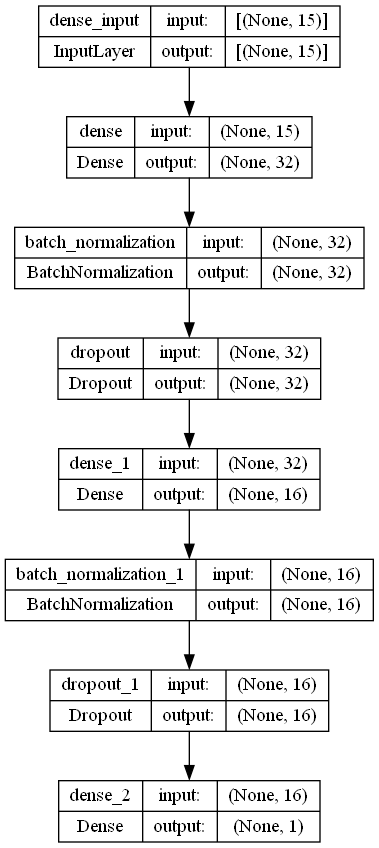

In [7]:
import matplotlib.pyplot as plt
import tensorflow as tf
from tensorflow.keras.utils import plot_model
 # 绘制模型结构图
plot_model(model, show_shapes=True, show_layer_names=True)

In [23]:
df_model_eval = df_model_eval.append({'Model': 'nn',
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'R2': R2,
                                          'MAPE': MAPE},
                                         ignore_index=True)
print(df_model_eval)

  Model       MSE      RMSE       MAE        R2      MAPE
0    nn  0.135877  0.368615  0.275680  0.514911  0.055642
1    bp  0.135877  0.368615  0.275680  0.514911  0.055642
2    nn  0.123524  0.351459  0.265242  0.583871  0.054212
3    nn  0.114085  0.337765  0.256720  0.591251  0.052533
4    nn  0.109285  0.330583  0.249956  0.639647  0.051018


C:\Users\Administrator\AppData\Local\Temp\ipykernel_25932\2494497521.py:1: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_eval = df_model_eval.append({'Model': 'nn',


bp

In [24]:
import numpy as np
import pandas as pd
from scipy import stats
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error, r2_score, mean_absolute_error

data = pd.read_csv(r"D:\DL_Homework\Kaggle2_Titanic\统计建模\数据\空值填补后数据集.csv", encoding='gb18030')
cols_to_convert = ['AQI指数', 'PM2.5', 'PM10', 'O3', 'no2', 'so2', 'co', 'T', 'Po', 'U', 'Ff', 'VV', 'RRR']
data[cols_to_convert] = data[cols_to_convert].astype(float)
y = data['AQI指数']
x = data.drop(['AQI指数','date'], axis=1)
 # 进行BOX-COX变换
y = stats.boxcox(y)[0]
 # 数据标准化
scaler = StandardScaler()
x = scaler.fit_transform(x)
 # 划分训练集和测试集
X_train, X_test, Y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=0)
 # 构建多层感知器
model = MLPRegressor(hidden_layer_sizes=(64, 32), activation='relu', solver='adam', max_iter=1000, alpha=0.0001, batch_size='auto', verbose=1, random_state=0, tol=0.0001)
 # 训练模型
model.fit(X_train, Y_train)
 # 预测结果
predictions = model.predict(X_test)

MSE = mean_squared_error(y_test, predictions)
RMSE = np.sqrt(mean_squared_error(y_test, predictions))
MAE = mean_absolute_error(y_test, predictions)
R2 = r2_score(y_test, predictions)
def mape(y_true, y_pred):
    return np.mean(np.abs((y_pred - y_true) / y_true))
MAPE = mean_absolute_percentage_error(y_test, predictions)

print("MSE:", MSE)
print("RMSE:", RMSE)
print("MAE:", MAE)
print("R2:", R2)
print("MAPE:", MAPE)
df_model_eval = df_model_eval.append({'Model': 'bp',
                                          'MSE': MSE,
                                          'RMSE': RMSE,
                                          'MAE': MAE,
                                          'R2': R2,
                                          'MAPE': MAPE},
                                         ignore_index=True)
print(df_model_eval)

Iteration 1, loss = 8.83860079
Iteration 2, loss = 5.26227352
Iteration 3, loss = 2.65052397
Iteration 4, loss = 1.24834148
Iteration 5, loss = 0.82320034
Iteration 6, loss = 0.66447451
Iteration 7, loss = 0.56345453
Iteration 8, loss = 0.50320745
Iteration 9, loss = 0.45420983
Iteration 10, loss = 0.41800465
Iteration 11, loss = 0.38857272
Iteration 12, loss = 0.36280810
Iteration 13, loss = 0.34099935
Iteration 14, loss = 0.32244649
Iteration 15, loss = 0.30619524
Iteration 16, loss = 0.29142518
Iteration 17, loss = 0.27807577
Iteration 18, loss = 0.26465928
Iteration 19, loss = 0.25319825
Iteration 20, loss = 0.24193968
Iteration 21, loss = 0.23152265
Iteration 22, loss = 0.22136220
Iteration 23, loss = 0.21214674
Iteration 24, loss = 0.20302277
Iteration 25, loss = 0.19414661
Iteration 26, loss = 0.18598280
Iteration 27, loss = 0.17858301
Iteration 28, loss = 0.16968373
Iteration 29, loss = 0.16128089
Iteration 30, loss = 0.15486782
Iteration 31, loss = 0.14813764
Iteration 32, los

C:\Users\Administrator\AppData\Local\Temp\ipykernel_25932\4130330023.py:41: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  df_model_eval = df_model_eval.append({'Model': 'bp',
